## Linear Regression (PPT Example)

## Case Study - 1 (Simple Linear Regression)

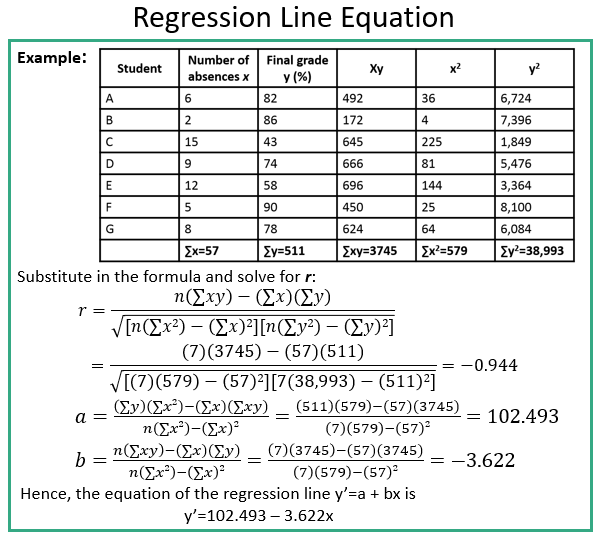

In [1]:
# importing required modules
import pandas as pd
import numpy as np

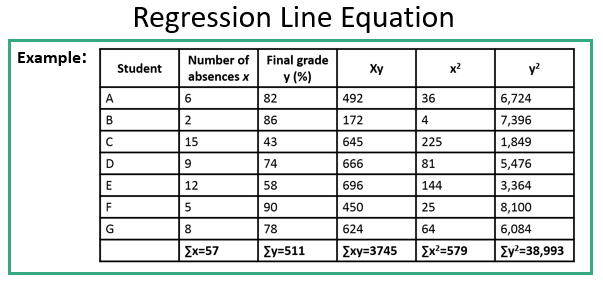

In [2]:
student_list = ["A", "B", "C", "D", "E", "F", "G"]
absence_list = [6, 2, 15, 9, 12, 5, 8]
grade_list = [82, 86, 43, 74, 58, 90, 78]
print ("student_list:", student_list, len(student_list))
print ("absence_list:", absence_list, len(absence_list))
print ("grade_list:", grade_list, len(grade_list))

student_list: ['A', 'B', 'C', 'D', 'E', 'F', 'G'] 7
absence_list: [6, 2, 15, 9, 12, 5, 8] 7
grade_list: [82, 86, 43, 74, 58, 90, 78] 7


In [3]:
# constructing the DataFrame
dict1 = dict(student=student_list, absence=absence_list, grade=grade_list)
print (dict1, len(dict1))
df = pd.DataFrame(dict1)
df

{'student': ['A', 'B', 'C', 'D', 'E', 'F', 'G'], 'absence': [6, 2, 15, 9, 12, 5, 8], 'grade': [82, 86, 43, 74, 58, 90, 78]} 3


,student,absence,grade
0,A,6,82
1,B,2,86
2,C,15,43
3,D,9,74
4,E,12,58
5,F,5,90
6,G,8,78


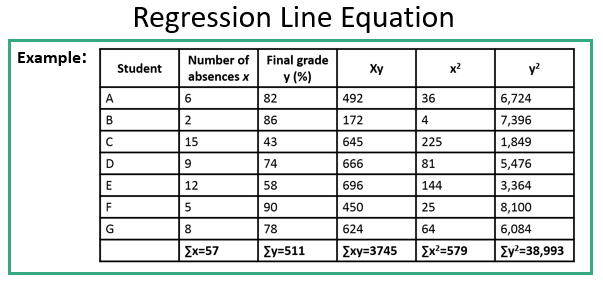

In [4]:
# constructing the DataFrame
dict1 = dict(student=student_list, x=absence_list, y=grade_list)
print (dict1, len(dict1))
df = pd.DataFrame(dict1)
df

{'student': ['A', 'B', 'C', 'D', 'E', 'F', 'G'], 'x': [6, 2, 15, 9, 12, 5, 8], 'y': [82, 86, 43, 74, 58, 90, 78]} 3


,student,x,y
0,A,6,82
1,B,2,86
2,C,15,43
3,D,9,74
4,E,12,58
5,F,5,90
6,G,8,78


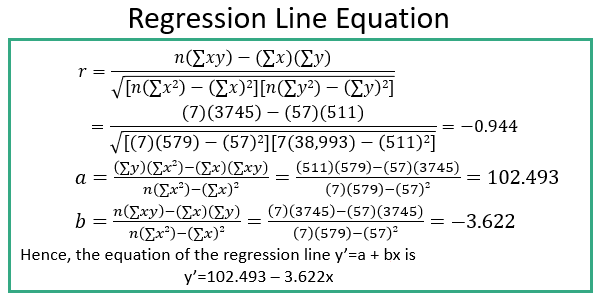

In [84]:
print (df.shape, df.shape[0], df.shape[1])
n = df.shape[0]
numerator = (n * np.sum(df.x * df.y) - np.sum(df.x) * np.sum(df.y))
denominator1 = (n * np.sum(np.square(df.x)) - np.square(np.sum(df.x)))
denominator2 = (n * np.sum(np.square(df.y)) - np.square(np.sum(df.y)))
denominator = np.sqrt(denominator1 * denominator2)
r = numerator / denominator
print ("numerator:", numerator)
print ("denominator:", denominator)
print ("r:", r)

(7, 3) 7 3
numerator: -2912
denominator: 3084.042801259412
r: -0.9442151706879178


In [85]:
r = df.corr()
print (r)
print ()
r = np.corrcoef(df.x, df.y)
print (r)
r = np.corrcoef(df.x, df.y)[0][1]
print ()
print ("r:", r)

          x         y
x  1.000000 -0.944215
y -0.944215  1.000000

[[ 1.         -0.94421517]
 [-0.94421517  1.        ]]

r: -0.944215170687918


In [86]:
numerator = (np.sum(df.y) * np.sum(np.square(df.x))) - (np.sum(df.x) * np.sum(df.x * df.y))
denominator = n * np.sum(np.square(df.x)) - np.square(np.sum(df.x))
a = numerator / denominator
print ("numerator:", numerator)
print ("denominator:", denominator)
print ("intercept a:", a)

numerator: 82404
denominator: 804
intercept a: 102.49253731343283


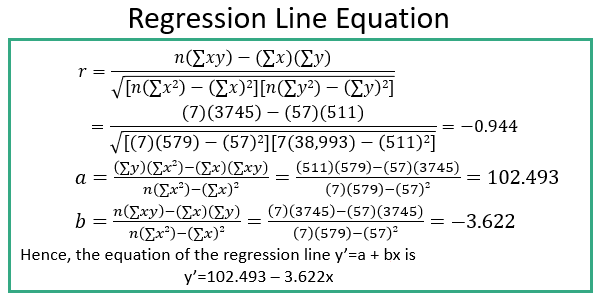

In [87]:
numerator = (n * np.sum(df.x * df.y) - np.sum(df.x) * np.sum(df.y))
denominator = n * np.sum(np.square(df.x)) - np.square(np.sum(df.x))
b = numerator / denominator
print ("numerator:", numerator)
print ("denominator:", denominator)
print ("coefficient b:", b)

numerator: -2912
denominator: 804
coefficient b: -3.6218905472636815


In [88]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
print (type(lm))

<class 'sklearn.linear_model._base.LinearRegression'>


In [89]:
# model training
X = df.drop(['student','y'], axis = 1)
X

,x
0,6
1,2
2,15
3,9
4,12
5,5
6,8


In [90]:
y = df.y
y

0    82
1    86
2    43
3    74
4    58
5    90
6    78
Name: y, dtype: int64

In [91]:
# model training
lm.fit(X, y)

LinearRegression()

#### These coefficients and intercept are called as **"Model Parameters"**.

In [92]:
print ("Estimated coefficients (b):", lm.coef_, "and length:", len(lm.coef_))

Estimated coefficients (b): [-3.62189055] and length: 1


In [93]:
print ("Intercept (a):", lm.intercept_)

Intercept (a): 102.49253731343283


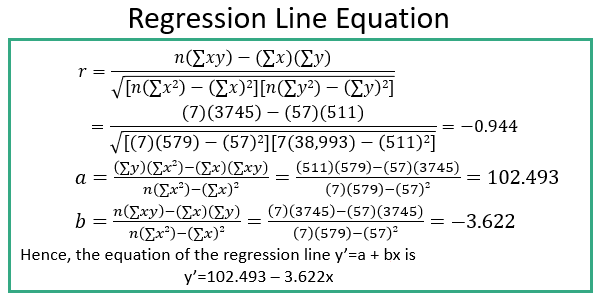

In [94]:
# predicting
absence = 10
absence_array = np.array([[10]])
print (absence, absence_array)
print ()
print (lm.predict(absence_array))
print (lm.predict(absence_array)[0])
print (a + b * absence)   # y' = a + b.x

10 [[10]]

[66.27363184]
66.27363184079601
66.27363184079601


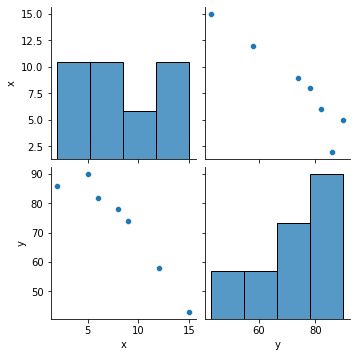

In [95]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(df, kind='scatter')
plt.show()

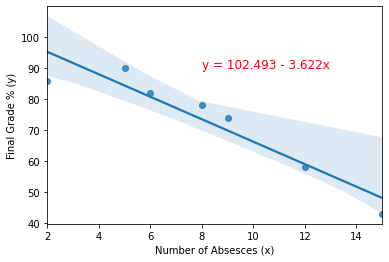

In [96]:
sns.regplot(x="x", y="y", data=df)
plt.xlabel("Number of Absesces (x)")
plt.ylabel("Final Grade % (y)")
plt.annotate('y = 102.493 - 3.622x', xy=(8, 90), fontsize=12, color='red')
plt.show()

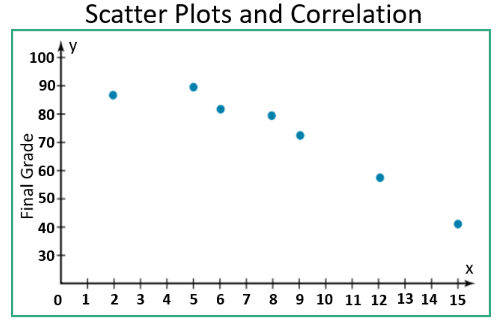

## Case Study - 2 (Multiple Linear Regression)

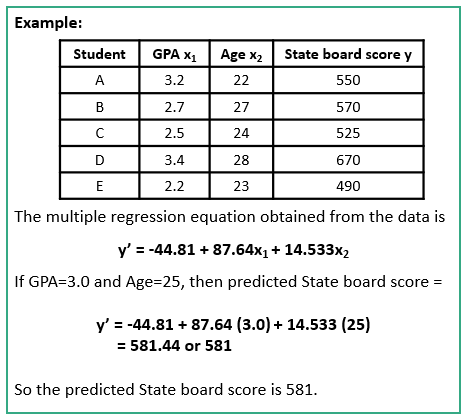

In [97]:
# constructing the DataFrame
student_list = ["A", "B", "C", "D", "E"]
gpa_List = [3.2, 2.7, 2.5, 3.4, 2.2]
age_list = [22, 27, 24, 28, 23]
score_list = [550, 570, 525, 670, 490]
dict1 = dict(student=student_list, x1=gpa_List, x2=age_list, y=score_list)
print (dict1, len(dict1))
df = pd.DataFrame(dict1)
df

{'student': ['A', 'B', 'C', 'D', 'E'], 'x1': [3.2, 2.7, 2.5, 3.4, 2.2], 'x2': [22, 27, 24, 28, 23], 'y': [550, 570, 525, 670, 490]} 4


,student,x1,x2,y
0,A,3.2,22,550
1,B,2.7,27,570
2,C,2.5,24,525
3,D,3.4,28,670
4,E,2.2,23,490


In [98]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
print (type(lm))

<class 'sklearn.linear_model._base.LinearRegression'>


In [99]:
# model training
X = df.drop(['student','y'], axis = 1)
X

,x1,x2
0,3.2,22
1,2.7,27
2,2.5,24
3,3.4,28
4,2.2,23


In [100]:
y = df.y
y

0    550
1    570
2    525
3    670
4    490
Name: y, dtype: int64

In [101]:
# model training
lm.fit(X, y)

LinearRegression()

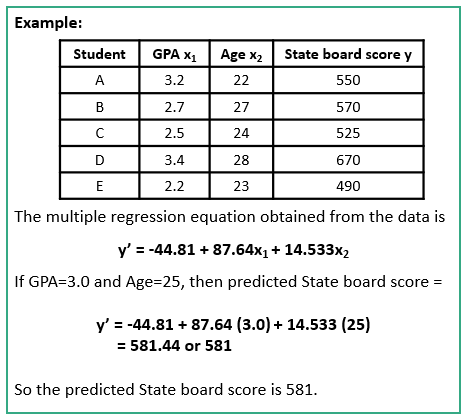

In [102]:
print ("Estimated coefficients (b):", lm.coef_, "and length:", len(lm.coef_))

Estimated coefficients (b): [87.64015185 14.53297431] and length: 2


In [103]:
print ("Intercept (a):", lm.intercept_)

Intercept (a): -44.81018804626103


In [104]:
import warnings
warnings.filterwarnings("ignore")
# predicting
test_row_array = np.array([[3.0, 25]])
print (test_row_array, len(test_row_array))
print ()
print (lm.predict(test_row_array))
print (lm.predict(test_row_array)[0])
print (lm.intercept_ + np.sum(lm.coef_ * test_row_array))   # y' = a + b.x

[[ 3. 25.]] 1

[581.43462523]
581.4346252317472
581.4346252317472
